# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

In [2]:
import pandas as pd
import numpy as np

In [3]:
meta = pd.read_csv('./data/mini.csv')
meta

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [3]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [4]:
meta.describe(include='all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


## 분석 방향

온라인 학습 플랫폼을 이용하는 유저 중 적극 사용자는 '활동 지수'가 높을 것입니다.  
활동 지수 지표로 커뮤니티 참여도를 중심으로 참여도가 높으면 월간 활동적인 학습 일수, 완료한 총 코스 수, 최근 학습 성취도가 높을 것이라는 가설을 검증하고 싶습니다. 

### 데이터 수집 및 로드

In [32]:
active_data = meta[['user_id', 'monthly_active_learning_days', 'total_completed_courses', 'recent_learning_achievement', 'community_engagement_level', 'target']]
active_data

,user_id,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,community_engagement_level,target
0,b919c29d,18,16,68.360455,4,0
1,a0a60abb,16,13,97.567322,3,1
2,b9f171ae,13,14,94.358763,4,1
3,5dc0ba8b,19,18,70.153228,3,1
4,65c83654,19,10,81.917908,4,1
...,...,...,...,...,...,...
9995,ae6b76bc,18,16,64.966803,5,1
9996,24588752,9,8,82.750244,3,1
9997,e4622a54,24,14,81.567839,5,1
9998,e07fbad9,10,10,89.885656,5,1


### 데이터 살펴보기

In [33]:
active_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       10000 non-null  object 
 1   monthly_active_learning_days  10000 non-null  int64  
 2   total_completed_courses       10000 non-null  int64  
 3   recent_learning_achievement   10000 non-null  float64
 4   community_engagement_level    10000 non-null  int64  
 5   target                        10000 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [34]:
active_data.describe(include='all')

,user_id,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,community_engagement_level,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,12.545400,12.227500,75.029513,3.886100,0.619900
std,NaN,6.932239,3.634125,9.968529,1.262175,0.485435
min,NaN,1.000000,1.000000,35.941755,1.000000,0.000000
25%,NaN,7.000000,10.000000,68.278054,3.000000,0.000000
50%,NaN,13.000000,12.000000,75.126061,4.000000,1.000000
75%,NaN,19.000000,15.000000,81.718976,5.000000,1.000000


### 데이터 전처리

In [35]:
active_data

,user_id,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,community_engagement_level,target
0,b919c29d,18,16,68.360455,4,0
1,a0a60abb,16,13,97.567322,3,1
2,b9f171ae,13,14,94.358763,4,1
3,5dc0ba8b,19,18,70.153228,3,1
4,65c83654,19,10,81.917908,4,1
...,...,...,...,...,...,...
9995,ae6b76bc,18,16,64.966803,5,1
9996,24588752,9,8,82.750244,3,1
9997,e4622a54,24,14,81.567839,5,1
9998,e07fbad9,10,10,89.885656,5,1


In [39]:
# 커뮤니티 참여도별 유저 수 구하기
community_user = active_data.groupby('community_engagement_level')['user_id'].count()
community_user

community_engagement_level
1     559
2    1219
3    1588
4    2070
5    4564
Name: user_id, dtype: int64

In [56]:
# 커뮤니티 참여도별 월간 활동적인 학습 일수 평균 구하기
community_monact = active_data.groupby('community_engagement_level')['monthly_active_learning_days'].mean()
community_monact

community_engagement_level
1    12.688730
2    12.755537
3    12.112720
4    12.653623
5    12.573181
Name: monthly_active_learning_days, dtype: float64

In [57]:
# 커뮤니티 참여도별 완료한 총 코스 수 평균 구하기
community_total = active_data.groupby('community_engagement_level')['total_completed_courses'].mean()
community_total

community_engagement_level
1     9.919499
2    11.047580
3    11.351385
4    12.255072
5    13.117660
Name: total_completed_courses, dtype: float64

In [61]:
# 커뮤니티 참여도별 최근 학습 성취도 평균 구하기
community_achi = active_data.groupby('community_engagement_level')['recent_learning_achievement'].mean()
community_achi

community_engagement_level
1    74.820052
2    74.782313
3    75.426017
4    75.133346
5    74.936138
Name: recent_learning_achievement, dtype: float64

In [66]:
# 커뮤니티 참여도별 다음달에 구독할 가능성이 있는 유저 수 구하기
community_next = active_data.groupby('community_engagement_level')['target'].sum()
community_next

community_engagement_level
1     348
2     751
3     968
4    1265
5    2867
Name: target, dtype: int64

### 데이터 시각화

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

In [81]:
import seaborn as sns
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)
# plt.rcParams['font.size'] = 11.0
plt.rcParams['font.family'] = 'Malgun Gothic' # 'batang'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
# matplotlib.rcParams['axes.unicode_minus'] = False

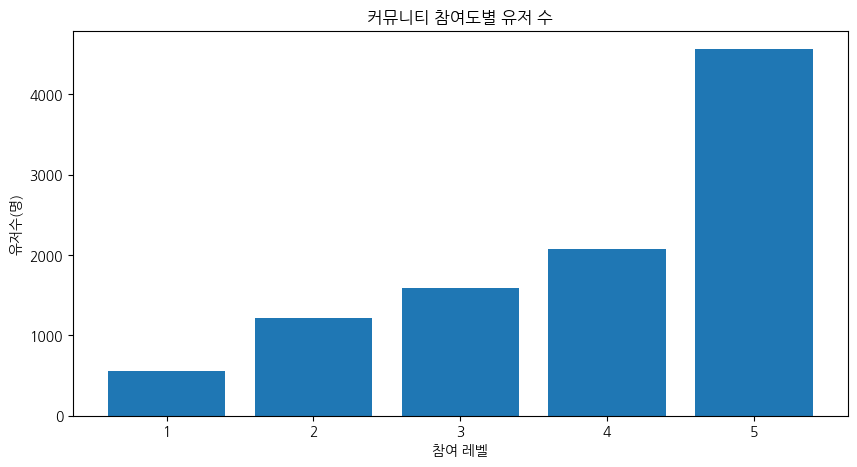

In [67]:
# 커뮤니티 참여도별 유저 수 구하기

#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(community_user.index, community_user.values)

#그래프 명
plt.title('커뮤니티 참여도별 유저 수')

#그래프 x축 레이블
plt.xlabel('참여 레벨')

#그래프 y축 레이블
plt.ylabel('유저수(명)')

#x축 레이블을
plt.xticks()

#그래프 출력
plt.show()

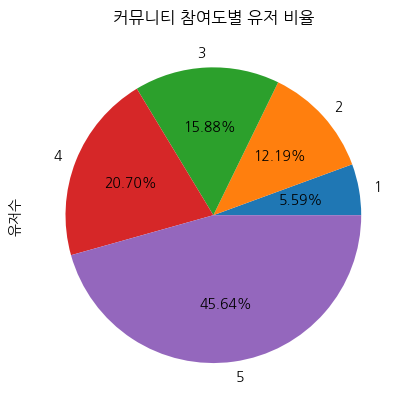

In [80]:
community_user.plot.pie(autopct='%.2f%%')
plt.title('커뮤니티 참여도별 유저 비율')
plt.ylabel('유저수')
plt.show()

커뮤니티에 적극 참여하는 레벨 5단계의 유저가 4564명으로 많다. 유저의 45%는 레벨 5 수준의 커뮤니티 참여 수준을 가지고 있고 커뮤니티 참여 레벨이 높을 수록 월간 활동 접속 일수, 완료 코스 수, 학습 성취도, 구독 가능성이 높은지 확인하고 싶다.

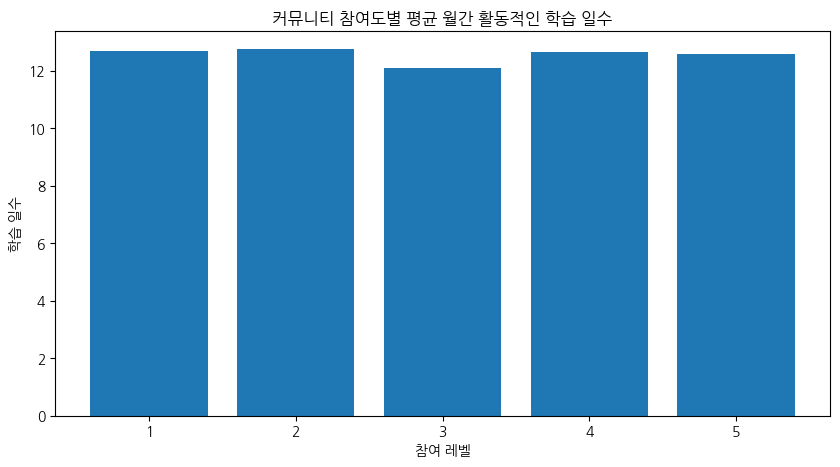

In [68]:
# 커뮤니티 참여도별 월간 활동적인 학습 일수 평균 구하기

#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(community_monact.index, community_monact.values)

#그래프 명
plt.title('커뮤니티 참여도별 평균 월간 활동적인 학습 일수')

#그래프 x축 레이블
plt.xlabel('참여 레벨')

#그래프 y축 레이블
plt.ylabel('학습 일수')

#x축 레이블을
plt.xticks()

#그래프 출력
plt.show()

커뮤니티 참여도별 평균 월간 활동적인 학습 일수를 보았을 때 레벨 구간별 큰 차이가 보이지 않는다. 커뮤니티 참여 레벨이 높다고 해서 낮은 참여도 레벨을 가진 유저보다 더 많이 학습한다고 결론 내리기 어렵다.  
- 평균 월간 활동적인 학습 일수에 영향을 미치는 다른 요인이 있지 않을까?
- 학습보다 커뮤니티에만 참여하는 이유가 있을까?

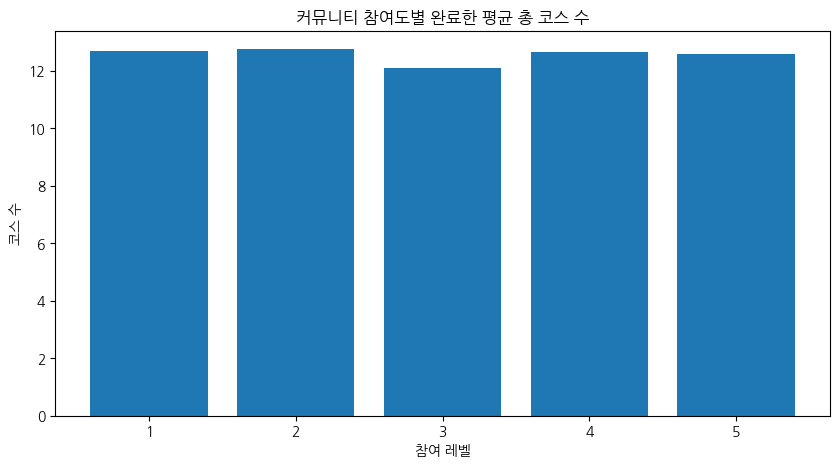

In [69]:
# 커뮤니티 참여도별 완료한 총 코스 수 평균 구하기

#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(community_monact.index, community_monact.values)

#그래프 명
plt.title('커뮤니티 참여도별 완료한 평균 총 코스 수')

#그래프 x축 레이블
plt.xlabel('참여 레벨')

#그래프 y축 레이블
plt.ylabel('코스 수')

#x축 레이블을
plt.xticks()

#그래프 출력
plt.show()

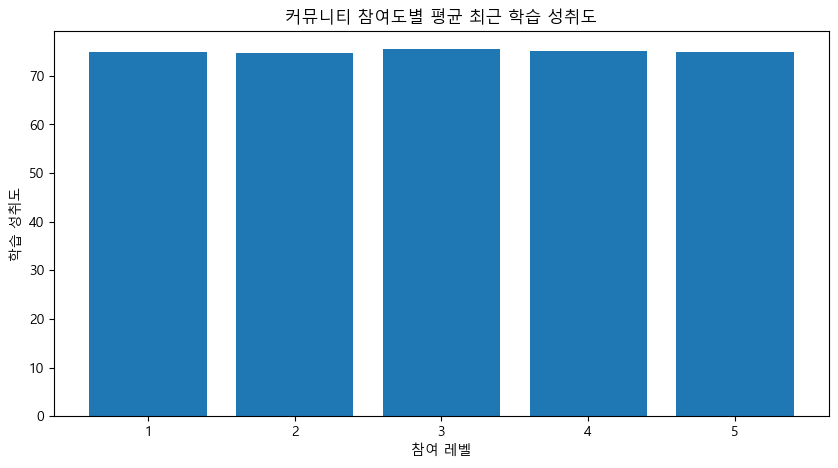

In [83]:
# 커뮤니티 참여도별 최근 학습 성취도 평균 구하기

#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(community_achi.index, community_achi.values)

#그래프 명
plt.title('커뮤니티 참여도별 평균 최근 학습 성취도')

#그래프 x축 레이블
plt.xlabel('참여 레벨')

#그래프 y축 레이블
plt.ylabel('학습 성취도')

#x축 레이블을
plt.xticks()

#그래프 출력
plt.show()

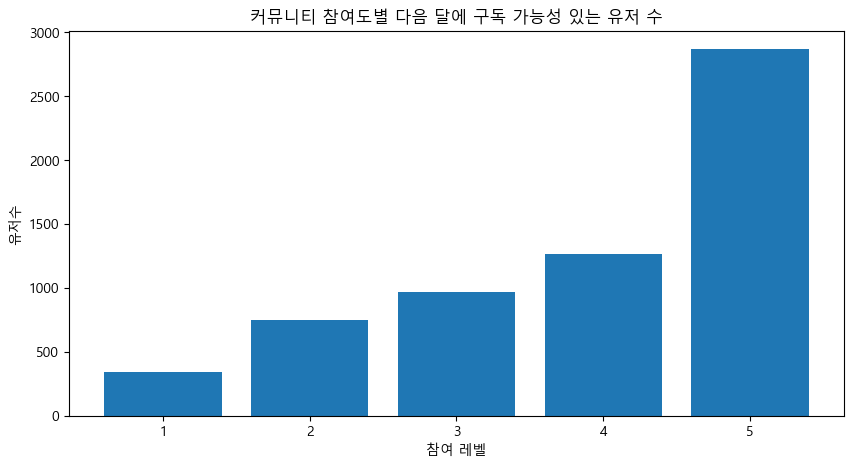

In [84]:
# 커뮤니티 참여도별 다음달에 구독할 가능성이 있는 유저 수 구하기

#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(community_next.index, community_next.values)

#그래프 명
plt.title('커뮤니티 참여도별 다음 달에 구독 가능성 있는 유저 수')

#그래프 x축 레이블
plt.xlabel('참여 레벨')

#그래프 y축 레이블
plt.ylabel('유저수')

#x축 레이블을
plt.xticks()

#그래프 출력
plt.show()

In [93]:
active_data_not_id = active_data.drop('user_id', axis=1)
active_data_not_id

,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,community_engagement_level,target
0,18,16,68.360455,4,0
1,16,13,97.567322,3,1
2,13,14,94.358763,4,1
3,19,18,70.153228,3,1
4,19,10,81.917908,4,1
...,...,...,...,...,...
9995,18,16,64.966803,5,1
9996,9,8,82.750244,3,1
9997,24,14,81.567839,5,1
9998,10,10,89.885656,5,1


In [94]:
active_data_not_target = active_data_not_id.drop('target', axis=1)
active_data_not_target

,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,community_engagement_level
0,18,16,68.360455,4
1,16,13,97.567322,3
2,13,14,94.358763,4
3,19,18,70.153228,3
4,19,10,81.917908,4
...,...,...,...,...
9995,18,16,64.966803,5
9996,9,8,82.750244,3
9997,24,14,81.567839,5
9998,10,10,89.885656,5


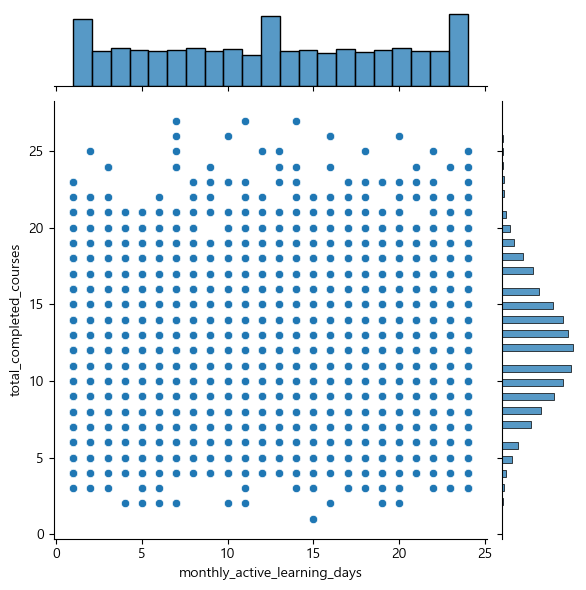

In [97]:
sns.jointplot(x='monthly_active_learning_days', y='total_completed_courses', data=active_data)

C:\Users\n2465\AppData\Local\Temp\ipykernel_37244\1652055337.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(active_data['recent_learning_achievement'], kde=True, rug=True)


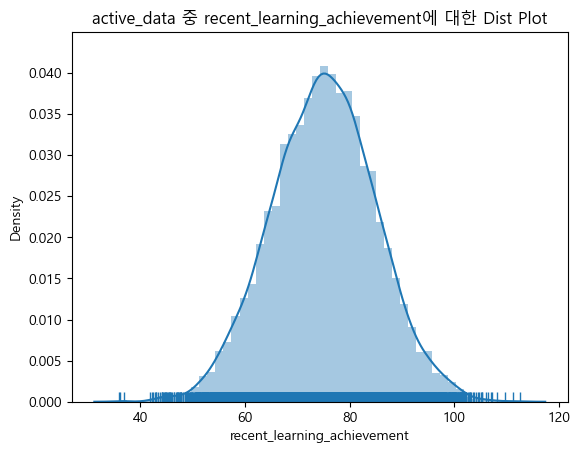

In [100]:
sns.distplot(active_data['recent_learning_achievement'], kde=True, rug=True)
plt.title("active_data 중 recent_learning_achievement에 대한 Dist Plot")
plt.show()

In [110]:
active_data_not_enga = active_data_not_id.drop('community_engagement_level', axis=1)
active_data_not_enga

,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,target
0,18,16,68.360455,0
1,16,13,97.567322,1
2,13,14,94.358763,1
3,19,18,70.153228,1
4,19,10,81.917908,1
...,...,...,...,...
9995,18,16,64.966803,1
9996,9,8,82.750244,1
9997,24,14,81.567839,1
9998,10,10,89.885656,1


C:\Users\n2465\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


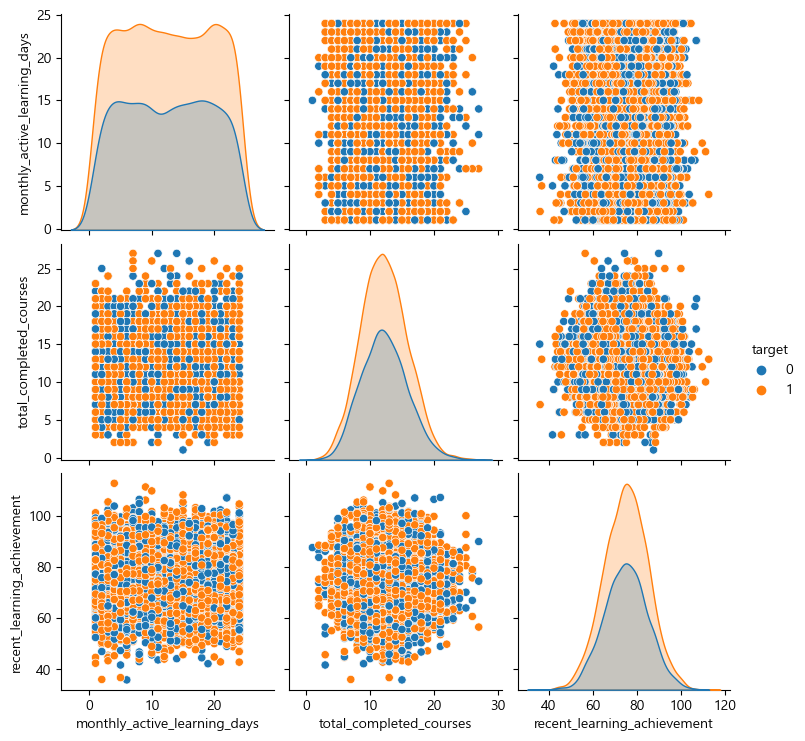

In [112]:
sns.pairplot(active_data_not_enga, hue='target')

In [113]:
active_size = active_data.pivot_table(index="community_engagement_level", columns="target", aggfunc="size")
active_size

target,0,1
community_engagement_level,,
1,211,348
2,468,751
3,620,968
4,805,1265
5,1697,2867


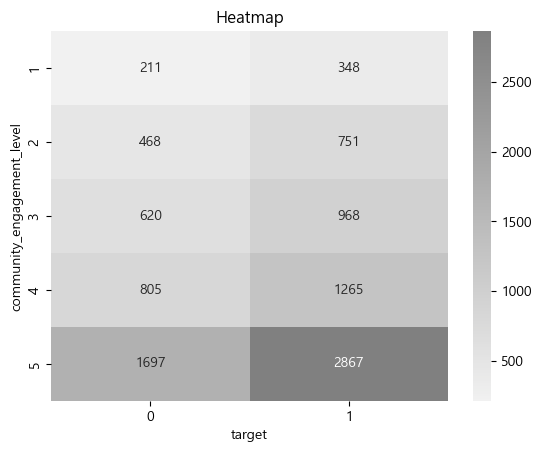

In [114]:
sns.heatmap(active_size, cmap=sns.light_palette("gray", as_cmap=True), annot=True, fmt="d") # annot 주석
plt.title("Heatmap")
plt.show()

커뮤니티 참여도별 평균 학습 일수, 완료 코스 수, 학습 성취도에는 레벨 별 큰 차이가 없어 커뮤니티 참여도가 높다고 해서 학습에 적극적으로 참여하는 유저라는 가설을 채택하기엔 유의미한 결과가 없다.  
다만 커뮤니티 참여도별 다음 달에 서비스를 구독할 가능성이 있는 유저 수를 보았을 때, 커뮤니티 참여 레벨이 높을 수록 서비스 구독을 할 가능성이 높다는 것을 보여주고 있으나 구독 여부에 결정적인 영향을 끼치는 요인으로 판단하기엔 다른 요인의 검토가 필요해 보인다.

### 추가

커뮤니티 참여도별 중단된 학습 세션 수는 어떻게 나타날까?  
커뮤니티 참여도가 높다고 해서 학습 결과가 더 높진 않았으나, 중단하는 유저는 적지 않을까?

In [118]:
community_aban = meta[['user_id', 'abandoned_learning_sessions', 'community_engagement_level', 'target']]
community_aban

,user_id,abandoned_learning_sessions,community_engagement_level,target
0,b919c29d,3,4,0
1,a0a60abb,2,3,1
2,b9f171ae,3,4,1
3,5dc0ba8b,0,3,1
4,65c83654,2,4,1
...,...,...,...,...
9995,ae6b76bc,2,5,1
9996,24588752,3,3,1
9997,e4622a54,3,5,1
9998,e07fbad9,4,5,1


In [125]:
# 커뮤니티 참여도별 평균 중단된 학습 세션 수
community_aban_mean = community_aban.groupby('community_engagement_level')['abandoned_learning_sessions'].mean()
community_aban_mean

community_engagement_level
1    2.982111
2    3.028712
3    2.962846
4    3.090338
5    3.062007
Name: abandoned_learning_sessions, dtype: float64

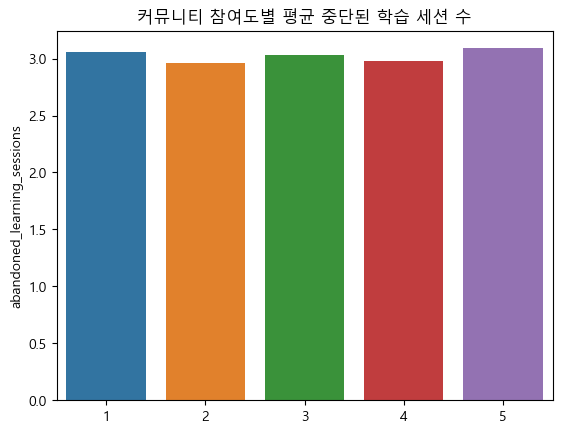

In [127]:
sns.barplot(x=meta['community_engagement_level'].unique(), y= community_aban_mean) 
plt.title("커뮤니티 참여도별 평균 중단된 학습 세션 수")
plt.show()

커뮤니티 참여도 별 평균 중단된 학습 세션 수의 차이도 크지 않아 커뮤니티 참여도가 학습에 미치는 영향은 높지 않다.

추가로 커뮤니티 참여도 별 선호하는 난이도, 구독 유형, 결제 패턴별 유저 수를 살펴보면서 이들 사이 어떤 연관이 있는지 살펴본다.

In [136]:
community_category = meta[['user_id', 'community_engagement_level', 'preferred_difficulty_level', 'subscription_type', 'payment_pattern', 'target']]
community_category

,user_id,community_engagement_level,preferred_difficulty_level,subscription_type,payment_pattern,target
0,b919c29d,4,Low,Basic,5,0
1,a0a60abb,3,Medium,Basic,6,1
2,b9f171ae,4,Medium,Premium,7,1
3,5dc0ba8b,3,Low,Basic,0,1
4,65c83654,4,Medium,Basic,0,1
...,...,...,...,...,...,...
9995,ae6b76bc,5,Low,Premium,1,1
9996,24588752,3,Medium,Basic,7,1
9997,e4622a54,5,High,Basic,6,1
9998,e07fbad9,5,Low,Basic,0,1


In [152]:
commu_prefer = pd.pivot_table(community_category, values='user_id', index='community_engagement_level', columns=['preferred_difficulty_level'], aggfunc='count')
commu_prefer

preferred_difficulty_level,High,Low,Medium
community_engagement_level,,,
1,222.0,NaN,337.0
2,257.0,621.0,341.0
3,376.0,575.0,637.0
4,431.0,1020.0,619.0
5,714.0,2776.0,1074.0


In [154]:
commu_prefer = commu_prefer.fillna(0)

In [157]:
commu_prefer = commu_prefer.values.astype(int)

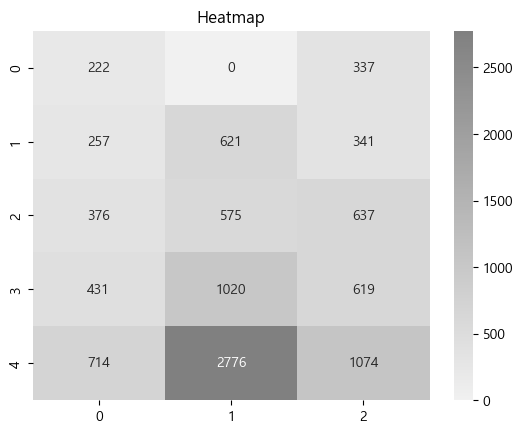

In [167]:
sns.heatmap(commu_prefer, cmap=sns.light_palette("gray", as_cmap=True), annot=True, fmt="d") # annot 주석
level = ['High', 'Low', 'Medium']

plt.title("Heatmap")
plt.show()

커뮤티니 참여도별 선호하는 학습 난이도별 유저수를 살펴보면, 커뮤니티 참여도가 높은데 선호 학습 난이도가 낮은 유저가 많다.
- 커뮤니티 참여도가 높고, 선호하는 학습 난이도가 낮다 -> 학습 코스를 기초부터 배우고 싶고 모르는 부분과 이해 하지 않는 부분, 학습 중 수행하는 과제들과 관련된 질문을 커뮤니티에 하면서 학습을 이어나가는 유저

In [168]:
commu_sub = community_category.pivot_table(values='user_id', index='community_engagement_level', columns=['subscription_type'], aggfunc='size')
commu_sub

subscription_type,Basic,Premium
community_engagement_level,,
1,559.0,NaN
2,1219.0,NaN
3,1158.0,430.0
4,1237.0,833.0
5,1806.0,2758.0


In [170]:
commu_sub = commu_sub.fillna(0).astype(int)
commu_sub

subscription_type,Basic,Premium
community_engagement_level,,
1,559,0
2,1219,0
3,1158,430
4,1237,833
5,1806,2758


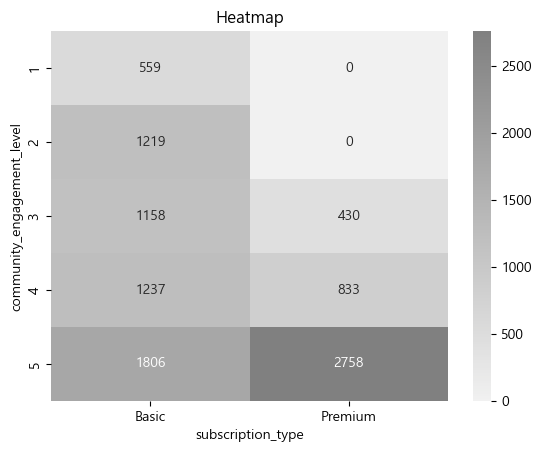

In [171]:
sns.heatmap(commu_sub, cmap=sns.light_palette("gray", as_cmap=True), annot=True, fmt="d") # annot 주석

plt.title("Heatmap")
plt.show()

커뮤니티 참여 레벨이 높을 수록 Premium 구독을 하는 유저가 많고, 참여도가 낮은 유저는 Premium 구독보다 Basic 구독을 선호하는 걸 알 수 있다.
- Premium 구독으로 유저를 전환시키기 위해선 유저의 커뮤니티 참여도를 높여야 하고, Premium 구독을 통해 효용을 느끼게 만들어 줄 Action이 필요하다.
- 커뮤니티 참여(글 작성, 댓글 작성, 콘텐츠 업로드, 과제 수행)를 독려하는 이벤트와 Premium 구독 체험권을 제공해 구독 전환율이 높아지는가에 대한 실험을 해볼 수 있다.

In [172]:
commu_pat = community_category.pivot_table(values='user_id', index='community_engagement_level', columns=['payment_pattern'], aggfunc='size')
commu_pat

payment_pattern,0,1,2,3,4,5,6,7
community_engagement_level,,,,,,,,
1,81,54,60,69,71,70,78,76
2,144,133,146,161,156,162,152,165
3,204,210,214,194,183,194,188,201
4,266,267,246,248,244,263,264,272
5,580,621,540,558,560,549,586,570


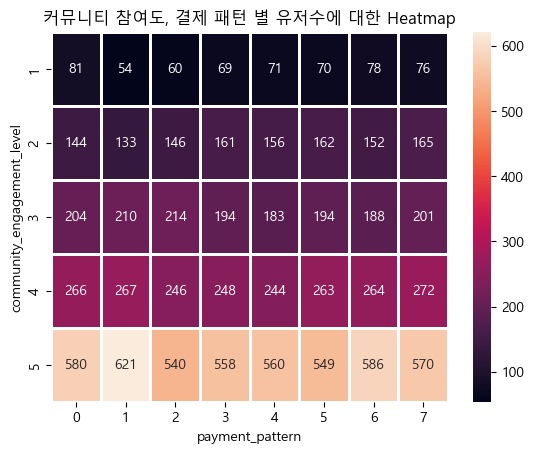

In [173]:
plt.title("커뮤니티 참여도, 결제 패턴 별 유저수에 대한 Heatmap")
sns.heatmap(commu_pat, annot=True, fmt="d", linewidths=1)
plt.show()

커뮤니티 참여도, 결제 패턴 별 유저수에 대한 히트맵을 살펴본 결과 커뮤니티 참여도가 높을 수록 결제 패턴이 다양한 유저 수가 많고, 전체적으로 각 레벨 별 패턴 분포가 고르게 퍼져 있음을 알 수 있다.
- 마지막 달에 결제하지 않은 유저에 대한 정보를 더 파악하여 왜 결제하지 않았는지 원인을 찾아야 한다. -> 서비스, 콘텐츠, 학습 코스에 변화가 있었는가?
- 첫 달에 결제하고 중간에 결제하지 않고 마지막 달에 결제한 유저는 중간에 왜 이탈했는지 원인을 파악해야 한다. -> 만약 결제일을 잊어서, 결제 카드 잔고 문제가 있었다면 결제일 push 메시지 강화를 고려해볼 수 있지 않을까? 